In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
from PIL import Image

In [2]:
google_api_key = os.getenv('GOOGLE_API_KEY')
if not google_api_key: 
    raise ValueError("GOOGLE_API_KEY is not set in the environment variables.")

In [3]:
prompt = "Provide an example recipe for the baked goods in the image. "

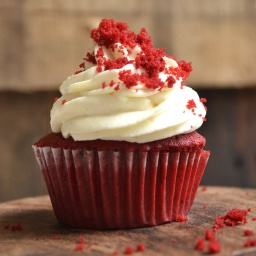

In [4]:
# img = Image.open('baked_goods_1.jpg')
# img = Image.open('baked_goods_2.jpg')
img = Image.open('baked_goods_3.jpg')
img

In [5]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Markdown, clear_output, display
import base64, io

In [7]:
def image_url(img):
    buffered = io.BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return f"data:image/jpeg;base64,{img_str}"

model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
message = HumanMessage(content=[
    {'type': 'text', 'text': prompt},
    {'type': 'image_url', 'image_url': image_url(img)},
])
response = model.stream([message])
buffer = []
for chunk in response:
    buffer.append(chunk.content)
    clear_output()
    display(Markdown(''.join(buffer)))

That's a red velvet cupcake!  Here's a recipe:

**Red Velvet Cupcakes**

**Yields:** 12 cupcakes
**Prep time:** 20 minutes
**Cook time:** 18-20 minutes


**Ingredients:**

**For the Cupcakes:**

* 2 cups all-purpose flour
* 2 tablespoons unsweetened cocoa powder
* 1 teaspoon baking soda
* 1/2 teaspoon baking powder
* 1/2 teaspoon salt
* 1 cup (2 sticks) unsalted butter, softened
* 1 3/4 cups granulated sugar
* 2 large eggs
* 2 teaspoons vanilla extract
* 1 cup buttermilk
* 2 tablespoons red food coloring (gel is best for color intensity)
* 1 tablespoon white vinegar


**For the Cream Cheese Frosting:**

* 8 ounces cream cheese, softened
* 1/2 cup (1 stick) unsalted butter, softened
* 3-4 cups powdered sugar
* 1 teaspoon vanilla extract


**Instructions:**

**Cupcakes:**

1. **Preheat oven to 350°F (175°C).** Line a 12-cup muffin tin with paper liners.
2. **Whisk dry ingredients:** In a medium bowl, whisk together flour, cocoa powder, baking soda, baking powder, and salt.
3. **Cream butter and sugar:** In a large bowl, cream together the softened butter and sugar until light and fluffy.
4. **Add eggs and vanilla:** Beat in the eggs one at a time, then stir in the vanilla extract.
5. **Combine wet ingredients:** In a small bowl, whisk together the buttermilk, red food coloring, and vinegar.
6. **Alternately add dry and wet ingredients:** Gradually add the dry ingredients to the wet ingredients, alternating with the buttermilk mixture, beginning and ending with the dry ingredients. Mix until just combined. Do not overmix.
7. **Fill cupcake liners:** Fill each cupcake liner about 2/3 full.
8. **Bake:** Bake for 18-20 minutes, or until a toothpick inserted into the center comes out clean.
9. **Cool:** Let the cupcakes cool in the muffin tin for a few minutes before transferring them to a wire rack to cool completely.


**Cream Cheese Frosting:**

1. **Beat cream cheese and butter:** In a large bowl, beat the softened cream cheese and butter together until smooth and creamy.
2. **Add powdered sugar:** Gradually add the powdered sugar, beating until light and fluffy.  Add more or less powdered sugar to reach your desired consistency.
3. **Add vanilla:** Stir in the vanilla extract.


**Assembly:**

1. Once the cupcakes are completely cool, frost them with the cream cheese frosting.
2. For extra flair, sprinkle some crushed red velvet cake crumbs on top of the frosting (you can make these by pulsing some leftover cake in a food processor).


**Tips & Notes:**

* Gel food coloring will give you a more vibrant red color than liquid food coloring.
* Don't overmix the batter, or your cupcakes will be tough.
* If you don't have buttermilk, you can make a substitute by adding 1 tablespoon of white vinegar or lemon juice to 1 cup of milk and letting it sit for 5 minutes.
* You can adjust the amount of powdered sugar in the frosting to achieve your desired consistency.


Enjoy your delicious homemade red velvet cupcakes!
